In [49]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

plt.style.use('ggplot')

In [7]:
df_canada = pd.read_excel(r"C:\Users\Hp\Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df_canada = df_canada.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df_canada = df_canada.rename(columns={
    "OdName" : "Country",
    "AreaName" : "Continent",
    "RegName" : "Region"
})
df_canada['Total'] = df_canada.sum(axis=1)


df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [9]:
df_canada = df_canada.set_index("Country")
df_canada.index.name = None

In [10]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
with open(r"C:\Users\Hp\alice_novel.txt", "r") as f:
    alice_novel = f.read()

In [12]:
print(alice_novel)

ï»¿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pict

In [16]:
!pip install wordcloud

In [18]:
print(STOPWORDS)

{'was', 'those', 'she', 'have', 'myself', 'be', 'cannot', 'below', 'then', "i've", 'can', 'from', "you'd", "don't", "we've", 'after', 'once', 'therefore', 'doing', 'are', 'hers', 'or', 'like', 'up', 'i', 'since', 'whom', "you've", 'if', 'otherwise', "you'll", 'until', 'here', 'we', 'being', 'herself', 'themselves', "mustn't", 'get', 'they', "we're", 'off', 'however', 'it', 'so', 'ought', 'our', 'yours', 'yourself', "he'll", "hadn't", 'out', 'both', 'him', 'some', 'is', 'how', 'and', "when's", 'been', 'than', 'does', "he'd", 'when', "that's", 'r', 'an', 'am', 'these', 'her', 'by', 'over', 'shall', 'his', 'could', 'on', 'between', "it's", 'what', 'own', 'against', 'nor', "shan't", 'while', 'which', 'himself', 'your', 'not', "she'd", 'why', "why's", "couldn't", 'http', 'yourselves', 'as', 'no', 'hence', 'before', "i'd", 'has', 'very', "there's", "he's", 'but', 'just', 'also', 'of', "she'll", 'having', 'who', 'because', "where's", "let's", 'he', 'other', 'did', "how's", 'a', 'you', 'the', 

In [19]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS
)
alice_wc.generate(alice_novel)

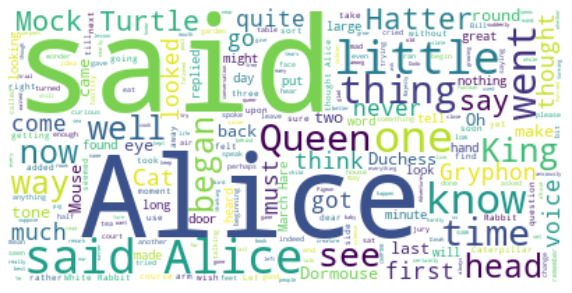

In [20]:
plt.figure(figsize=(10,6))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

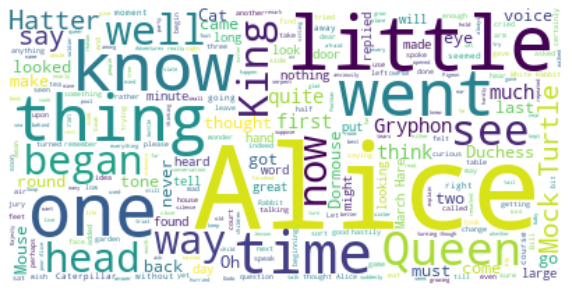

In [21]:
STOPWORDS.add("said")

alice_wc.generate(alice_novel)

plt.figure(figsize=(10,6))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
alice_img = Image.open(r"C:\Users\Hp\img_alice.jpeg")

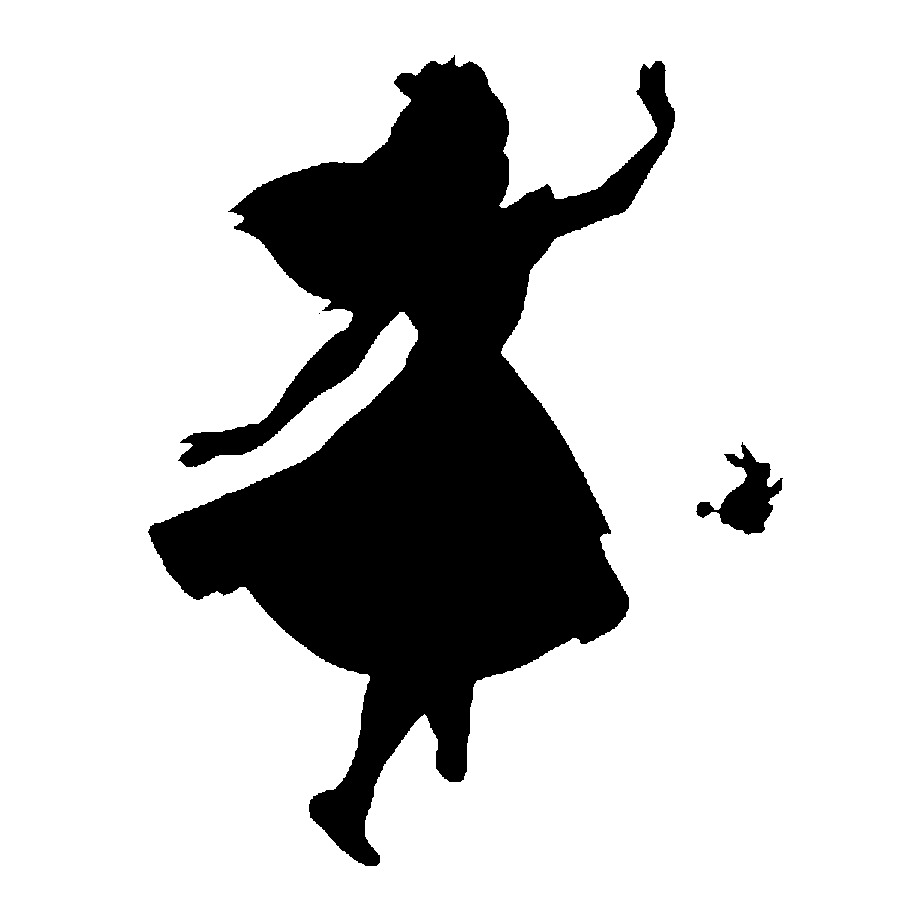

In [28]:
alice_img

In [29]:
alice_mask = np.array(alice_img)

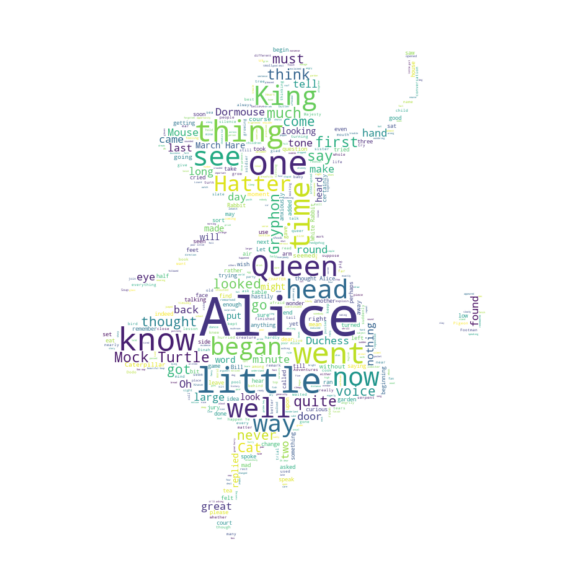

In [30]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS,
    mask=alice_mask
)
alice_wc.generate(alice_novel)

plt.figure(figsize=(10,14))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [40]:
max_words = 1500
word_string = ""

for country in df_canada.index.tolist():
    if len(country.split(" ")) == 1:
        num_repeat = int(
            df_canada.loc[country, "Total"] / float(df_canada.Total.sum()) * max_words
        )
        word_string = word_string + ((country + " ")*num_repeat)
        
print(word_string)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Argentina Australia Australia Australia Australia Australia Austria Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium Belgium Bhutan Brazil Brazil Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Cameroon Chile Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China 

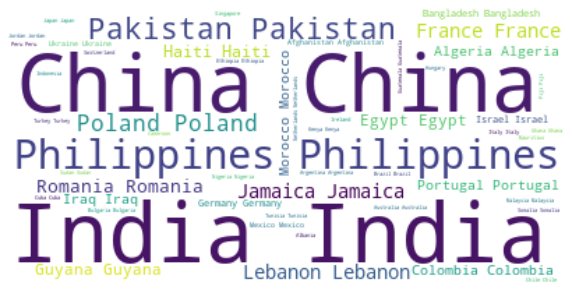

In [47]:
canada_wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS
)
canada_wc.generate(word_string)

plt.figure(figsize=(10,6))
plt.imshow(canada_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
!pip install folium

In [50]:
world_map = folium.Map()
world_map

In [53]:
semarang = folium.Map(location=(-6.9932,110.4203), zoom_start=50)
semarang

In [55]:
kota_A = folium.Map(location=(-6.2607187,106.7816162), zoom_start=10)
kota_A

In [56]:
bandung = folium.Map(location=(-6.903429, 107.5030708), zoom_start=10)
bandung